# Revenue Leakage & Profitability Analysis

**Role:** Business / Revenue Analyst  
**Objective:** Identify profit leakage despite healthy sales and recommend corrective actions.

This analysis investigates why strong sales performance does not translate into profitability, with a focus on identifying product-level revenue leakage.



## Business Problem

The business is experiencing healthy sales volumes but overall profitability is underperforming.

Leadership wants to understand:
- Where profits are leaking
- Which product categories and sub-categories are responsible
- Whether discounting is contributing to losses
- What actions should be prioritized to improve margins

The goal of this analysis is to move beyond revenue metrics and identify the true drivers of profit erosion.


# Dataset Overview

- Source: Sample Superstore Dataset
- Each row represents a single product line item within an order
- Key columns:
  - `Sales`: Revenue generated per line item
  - `Profit`: Profit or loss per line item
  - `Discount`: Discount applied (0–80%)
  - `Category` and `Sub-Category`: Product classification
- Total records: ~10,000 transactions


In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\shiva\\OneDrive\\Desktop\\DataAnalystPracticeProjects\\SampleSuperstore.csv")

## Initial Data Exploration

The dataset was explored to understand structure, data types, and the overall distribution of key financial metrics such as sales, profit, and discounts.


In [2]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [3]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

## Profitability Analysis

Revenue alone does not reflect business health.  
This section focuses on understanding how frequently transactions result in losses and whether profit erosion is widespread or isolated.


In [4]:
df['Is_loss'] = df['Profit'] < 0

In [5]:
df['Is_loss'].value_counts()

Is_loss
False    8123
True     1871
Name: count, dtype: int64

**Key Observation**

Approximately **19% of all transactions are loss-making**, indicating that profitability issues are not isolated incidents but a systemic concern.


## Category-Level Performance: Revenue vs Profit

To identify profit leakage, sales and profit were aggregated at the product category level.
This helps reveal whether high-revenue categories are also contributing positively to profit.


In [6]:
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

In [7]:
category_summary = (
df.groupby('Category').agg(
    Total_sales = ('Sales', 'sum'),
    Total_Profit= ('Profit', 'sum'),
    Avg_Discount = ('Discount', 'mean')
).sort_values('Total_Profit')
)

category_summary

,Total_sales,Total_Profit,Avg_Discount
Category,,,
Furniture,741999.7953,18451.2728,0.173923
Office Supplies,719047.0320,122490.8008,0.157285
Technology,836154.0330,145454.9481,0.132323


In [8]:
#Sort by Sales vs Profit

category_summary.sort_values('Total_sales', ascending = False)

,Total_sales,Total_Profit,Avg_Discount
Category,,,
Technology,836154.0330,145454.9481,0.132323
Furniture,741999.7953,18451.2728,0.173923
Office Supplies,719047.0320,122490.8008,0.157285


In [9]:
category_summary.sort_values('Total_Profit', ascending = False)

,Total_sales,Total_Profit,Avg_Discount
Category,,,
Technology,836154.0330,145454.9481,0.132323
Office Supplies,719047.0320,122490.8008,0.157285
Furniture,741999.7953,18451.2728,0.173923


In [19]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e2/e2/fd0bbadf837f81edb0d208ba8f8cb552874c3b16e27cb91a31977d90875d/matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 52.8/52.8 kB 1.4 MB/s eta 0:00:00
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/54/ec/5162b8582f2c994721018d0c9ece9dc6ff769d298a8ac6b6a652c307e7df/contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/63/fa/bfdc98abb4dd2bd491033e85e3ba69a2313c850e759a6daa014bc9433b0f/fonttools-4.61.1-cp310-cp310-win_am

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: C:\python310\python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


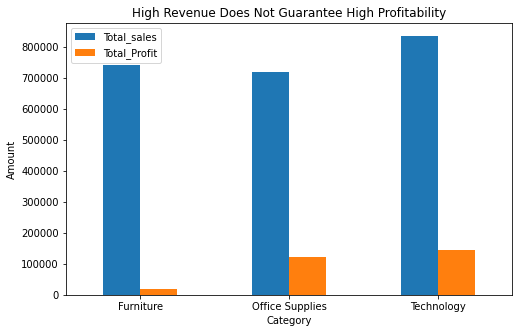

In [20]:
import matplotlib.pyplot as plt

category_summary[['Total_sales', 'Total_Profit']].plot(
kind='bar',
    figsize = (8,5)
)

plt.title('High Revenue Does Not Guarantee High Profitability')
plt.ylabel("Amount")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.show()

This comparison highlights that Furniture appears strong by revenue but underperforms significantly when evaluated on profit.


**Insight**

- Technology shows strong alignment between sales and profit.
- Furniture generates substantial revenue but contributes the lowest total profit.

This indicates a **revenue–profit mismatch**, where high sales volumes mask underlying margin issues.


## Sub-Category Drill-Down: Identifying Loss Drivers

To understand why Furniture underperforms, the category was analyzed at the sub-category level.


In [11]:
furniture_df = df[df['Category'] == 'Furniture']
furniture_df


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Is_loss
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,False
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,False
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,True
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,False
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704,True
9964,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,Furnishings,13.4000,1,0.00,6.4320,False
9980,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Tables,85.9800,1,0.00,22.3548,False
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,False


In [12]:
furniture_df['Discount'].describe()

count    2121.000000
mean        0.173923
std         0.181547
min         0.000000
25%         0.000000
50%         0.200000
75%         0.300000
max         0.700000
Name: Discount, dtype: float64

In [13]:
furniture_summary = (
furniture_df.groupby('Sub-Category')
    .agg(
        Total_sales = ('Sales', 'sum'),
        Total_Profit = ('Profit', 'sum'),
        Avg_Discount = ('Discount', 'mean')
    )
    .sort_values('Total_Profit')
)

furniture_summary

,Total_sales,Total_Profit,Avg_Discount
Sub-Category,,,
Tables,206965.5320,-17725.4811,0.261285
Bookcases,114879.9963,-3472.5560,0.211140
Furnishings,91705.1640,13059.1436,0.138349
Chairs,328449.1030,26590.1663,0.170178


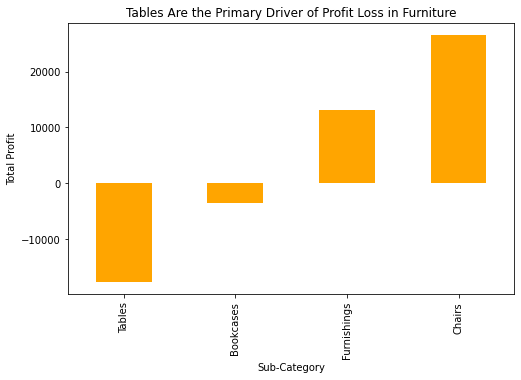

In [21]:
furniture_summary['Total_Profit'].sort_values().plot(
    kind='bar',
    figsize=(8,5),
    color='orange'
)

plt.title("Tables Are the Primary Driver of Profit Loss in Furniture")
plt.ylabel("Total Profit")
plt.xlabel('Sub-Category')
plt.show()

## Impact of Discounting on Profitability

Discounting was analyzed as a potential driver of losses, particularly within the Furniture category.


In [15]:
furniture_summary['Loss_Ratio'] = (
    furniture_summary['Total_Profit']/furniture_summary['Total_sales']
)

In [16]:
furniture_summary.sort_values('Loss_Ratio')

,Total_sales,Total_Profit,Avg_Discount,Loss_Ratio
Sub-Category,,,,
Tables,206965.5320,-17725.4811,0.261285,-0.085645
Bookcases,114879.9963,-3472.5560,0.211140,-0.030228
Chairs,328449.1030,26590.1663,0.170178,0.080957
Furnishings,91705.1640,13059.1436,0.138349,0.142404


In [17]:
furniture_summary.sort_values('Total_Profit')

,Total_sales,Total_Profit,Avg_Discount,Loss_Ratio
Sub-Category,,,,
Tables,206965.5320,-17725.4811,0.261285,-0.085645
Bookcases,114879.9963,-3472.5560,0.211140,-0.030228
Furnishings,91705.1640,13059.1436,0.138349,0.142404
Chairs,328449.1030,26590.1663,0.170178,0.080957


**Key Findings**

- **Tables** are the largest source of profit leakage:
  - Lose ~₹0.08 for every ₹1 earned
  - Highest absolute and relative losses
- **Bookcases** are the second largest contributor to losses
- Both sub-categories are among the top sellers, indicating that losses come from **popular products**, not weak demand


## Business Recommendations

**Priority 1: Tables**
- Limit discounts beyond 20–25%
- Review pricing and cost structure for high-volume SKUs
- Evaluate whether logistics or procurement costs amplify losses

**Priority 2: Bookcases**
- Apply targeted interventions to loss-making products
- Avoid blanket discounting across the sub-category

**Risk if Ignored**
- Revenue growth will continue to mask declining profitability
- Capital may be misallocated toward loss-making products


## Key Takeaway

This analysis demonstrates that revenue growth alone is an incomplete measure of business health.
By identifying Tables as the primary source of profit leakage and linking losses to aggressive discounting, the project shows how data-driven analysis can guide targeted, high-impact business decisions.
